In [2]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
#from matplotlib.animation import FuncAnimation
%matplotlib notebook
plt.style.use('fivethirtyeight')


In [3]:
all_keys = open('twitter_login.txt','r').read().splitlines()

In [4]:
api_key = all_keys[0]
api_key_secret = all_keys[1]
access_token = all_keys[2]
access_token_secret = all_keys[3]

In [5]:
#Authenticating using Twitter API
authenticator = tweepy.OAuthHandler(api_key,api_key_secret)
authenticator.set_access_token(access_token, access_token_secret)

In [6]:
api = tweepy.API(authenticator, wait_on_rate_limit = True)

In [7]:
crypto_currency = 'Dogecoin'
search = f' #{crypto_currency} -filter:retweets'

In [8]:
tweet_cursor = tweepy.Cursor(api.search, q = search, lang = 'en', tweet_mode = 'extended').items(300)

In [9]:
tweets = [tweet.full_text for tweet in tweet_cursor]

In [10]:
tweets_df = pd.DataFrame(tweets, columns = ['Tweets'])

In [11]:
for _ , row in tweets_df.iterrows():
    row['Tweets'] = re.sub('http\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('#\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('@\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('\\n', '', row['Tweets'])

In [12]:
tweets_df['Polarity'] = tweets_df['Tweets'].map(lambda tweet: TextBlob(tweet).sentiment.polarity)
tweets_df['Result'] = tweets_df['Polarity'].map(lambda pol: '+' if pol > 0 else '-')

In [13]:
positive = tweets_df[tweets_df.Result == '+'].count()['Tweets']
negative = tweets_df[tweets_df.Result == '-'].count()['Tweets']

<IPython.core.display.Javascript object>


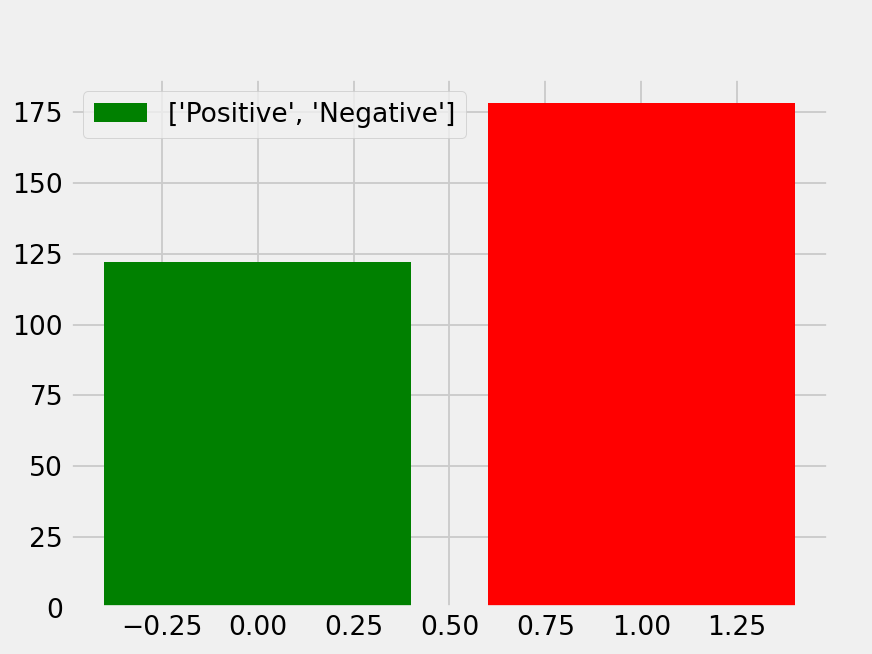

In [14]:
plt.bar([0,1], [positive, negative], label = ['Positive', 'Negative'], color = ['green','red'])
plt.legend()
plt.show()

In [14]:
from tweepy import Stream
from tweepy import StreamListener
import json
import csv

In [15]:
twittes = api.home_timeline()
for tweet in twittes:
    print(tweet.text)

#NewsAlert | Delhi Police nabs one of the key accused in the #RDayViolence case. 

Details by Bhavatosh. https://t.co/lk2YuYhm9O
ओ पाजी बिरयानी खाओ आपसी भाईचारा बढ़ेगा। https://t.co/NLOkNM1MUI
Single day spike of 46,148 COVID-19 infections, 979 fatalities push India's tally of cases to 3,02,79,331, death to… https://t.co/SK8lbphvWN
Opinion | Despite judicial verdicts, India’s sexual minorities face discrimination in employment, health issues and… https://t.co/SqLg1H7E1K
#ExpressOpinion | Turn government-owned spaces into permanent Covid vaccination centres

Miniya Chatterjee and Dhav… https://t.co/nXjb47BnKf
RT @ETtech: 💊PharmEasy has raised $300 million more, bringing the total funding received by the online pharmacy since April to $650 million…
Decades after France tested nuclear weapons in the desert, many residents of the Sahara feel they are still being t… https://t.co/IqOWUiOzM9
RT @IExpressSports: Why did the former South African pacer Makhaya Ntini not get into the team bus but

In [16]:
dogecoin = 0
elon_musk = 0

header_name = ['Dogecoin', 'Elon Musk']
with open('sentiment.csv', 'w') as file:
    writer = csv.DictWriter(file, fieldnames=header_name)
    writer.writeheader()

class Listener(StreamListener):
    
    def on_data(self, data):
        raw_twitts = json.loads(data)
        try:
            tweets = raw_twitts['text']
            #remove #, usernames and other tags
            tweets = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweets).split())
            #filtering out retweets RT
            tweets = ' '.join(re.sub('RT',' ', tweets).split())
            
            blob = TextBlob(tweets.strip())
            
            global dogecoin
            global elon_musk
            
            doge_sentiment = 0
            elon_sentiment = 0
            
            for sent in blob.sentences:
                if "Dogecoin" in sent and "Elon Musk" not in sent:
                    doge_sentiment = doge_sentiment + sent.sentiment.polarity
                else:
                    elon_sentiment = elon_sentiment + sent.sentiment.polarity
            
            dogecoin = dogecoin + doge_sentiment
            elon_musk = elon_musk + elon_sentiment
            
            with open('sentiment.csv', 'a') as file:
                writer = csv.DictWriter(file, fieldnames=header_name)
                info = {
                    'Dogecoin': dogecoin,
                    'Elon Musk': elon_musk
                }
                writer.writerow(info)
            
            print(tweets)
            print()
        except:
            print('Found an Error')
        
    def on_error(self, status):
        print(status)

In [ ]:
twitter_stream = Stream(authenticator, Listener())
twitter_stream.filter(track = ['Dogecoin', 'Elon Musk'])

CryptoBull I Will Giveaway 500 Of DOGE To Two People 250 Each In Just 24Hours Retweet amp Like Follow Me With Noti On

Happy birthday ELON Musk I hope your dream of Mars Kingdom will come true soon I think

ToTheMoon Tesla Dogecoin ShibaInu Safemoon Ford XRP Cardano Bitcoin Ethereum Litecoin onlyfans fansonly Hold H

120 to one person in 24 hours Retweet amp upvote positive comment on doge dogecoin dogearmy dog

to foundation AI

Dogecoin is breaking out

Me af dogecoin doge meme memes

dogecoin doge DogeFather

Check out Cryptogarb s video TikTok ElonMusk fyp Elon dogecoin doge SpaceX Space bitcoin d

Hey guys at what price are you buying dogecoin

shibainu shib Elon Musk really was born 69 days after 4 20 and this year its the BIG FIVE ZERO Let

202 happybirthdayelonmusk dogecoin TO THE MOOOOOOOOOOOON dogearmy Doge4Tesla

Be ready to become millionaire

I am guessing Elon Musk isn t getting Bitcoin for his birthday

That s how my mouth waters when Dogecoin rises dogecoin

HPBD HPBDEl

DOJO DOJO will be listed on ZT Exchange soon I wish Elon Musk happy birthday DOJO 1000x Opportunity Liquidi

I wanna see 0 30 dogecoin sooooon

Wishing of the musk family First of his name maybe not the uncrushed Father of dogecoin and 6 other

Did you see the proposal to reduce dogecoin fees by 100x Would you mind helping to get the word out This is

HappyBirthdayElon Thank You For Everything You ve Done For Dogecoin And The You Are Appreciated

DOJO DOJO will be listed on ZT Exchange soon I wish Elon Musk happy birthday DOJO 1000x Opportunity Liquidi

5 Antminerl3 with PSU router cables mounted and ready to run crypto cryptocurrency bitcoin ethereum

CHHi is a new potential dog coin created to compete with the dogecoin and shib Airdrop is launching now

DOJO DOJO will be listed on ZT Exchange soon I wish Elon Musk happy birthday DOJO 1000x Opportunity Liquidi

Sincere congratulations to Elon Musk happy birthday

Elon Musk once said When something is important enough you do it even if

entrepreneurs selfemployed AffiliateMarketing DigitalMarketing EmailMarketing crypto cryptocurrency cryptocurre

Thanks so much for the words of support as I ve said they matter more than people think as well

HappyBirthdayElonMusk dogecoin dogearmy DogeFather

DOJO DOJO will be listed on ZT Exchange soon I wish Elon Musk happy birthday DOJO 1000x Opportunity Liquidi

Babydoge amp Elon musk

doge dogecoin father s day offer

Goodnight to everyone who s HODLing so we can get to the moon dogecoin

DOJO DOJO will be listed on ZT Exchange soon I wish Elon Musk happy birthday DOJO 1000x Opportunity Liquidi

Claim 120 Worth of HINU tokens for free Like Retweet and Tag 3 friends Airdrop Dog

DOJO DOJO will be listed on ZT Exchange soon I wish Elon Musk happy birthday DOJO 1000x Opportunity Liquidi

Happy 50th birthday the Dogefather Website dogefatherbsc jfkjr

Elon Musk is celebrating his 50th birthday Happy50thElon Here s to 50 times spinning around the sun being a beacon of l

125 6000 PHP

DOJO DOJO will be listed on ZT Exchange soon I wish Elon Musk happy birthday DOJO 1000x Opportunity Liquidi

Elon Musk is celebrating his 50th birthday Happy50thElon Here s to 50 times spinning around the sun being a beacon of l

Ok so who let the dogs out I think it was what you think guys

Let s celebrate the 50th birthday of Elon Musk He s the owner of several companies of SpaceX Tesla The Boring Company

HappyBirthdayElon Thank You For Everything You ve Done For Dogecoin And The You Are Appreciated

affiliatemarketing affiliates affiliateprogram affiliated affiliatemarketing Check my website makemoney

linkedin twitter facebook instagram bitcoin socialmedia pinterest dogecoin deal gift gifts giftideas

linkedin twitter facebook instagram tiktok socialmedia pinterest dogecoin reddit gift gifts giftideas

tumblr twitter facebook instagram dogecoin socialmedia pinterest doge deal gift gifts giftideas deal

Inu hello dear followers you will be home to many stray animals with this proje

A lot yellow flowers wondering why loves Dogecoin

Follow me amp rt if u wanna win 333 dogecoin

Elon Musk y otros famosos con s ndrome de Asperger CONOZCA c mo esa enfermedad se convirti en en esos casos en un e

piyush Happy Birthday Elon Musk The dogearmy loves you

Dogecoin is breaking out

DOJO DOJO will be listed on ZT Exchange soon I wish Elon Musk happy birthday DOJO 1000x Opportunity Liquidi

DOJO DOJO will be listed on ZT Exchange soon I wish Elon Musk happy birthday DOJO 1000x Opportunity Liquidit



Happy50thElon We love you

business businesses earnmoney businesstips businessgrowth affiliatemarketing Check my website makemoney earnm

HappyBirthdayElon Thank You For Everything You ve Done For Dogecoin And The You Are Appreciated

Dogecoin for McDonald s Dogecoin4McDonalds

Hinuswap Dogecoin Binance

Happy Birthday thanks for your contribution for sustainable future ElonMusk HappyBirthdayElon dogecoin DogeFather

Some of them aren t worth listening to anyway Most are just sp

That sounds good

Average Elon Musk fan vs average Jerma enjoyer

happy birthday elon musk and testla

DOJO DOJO will be listed on ZT Exchange soon I wish Elon Musk happy birthday DOJO 1000x Opportunity Liquidit



FREE 500 giveaway 250 Doge 250 BabyDoge To enter 1 Retweet Like this tweet 2 Follow me

It s permanent Shib will forever be known as the crypto that wanted to kill Dogecoin

r Look at good ole Doge taking up 80 of that screen Dogecoin

DOJO DOJO will be listed on ZT Exchange soon I wish Elon Musk happy birthday DOJO 1000x Opportunity Liquidit

Elon Musk hold 216Million in Shiba Inu 30 000 000 069 420 7 SHIB shiba shibainu elon

Happy birthday Elon Musk one of my favourite billionaire

Average Elon Musk fan vs average Jerma enjoyer

Elon Musk really was born 69 days after 4 20 and this year its the BIG FIVE ZERO Let s all wish a HAPPY 50t

DOJO DOJO will be listed on ZT Exchange soon I wish Elon Musk happy birthday DOJO 1000x Opportunity Liquidi

Happy birthday dogecoin happy

Happy Birthday Elon Musk It s weirdly wonderful that you look like us human haha ha Thanks

Good Project BETA DEFI BSC Binance PancakeSwap Dogecoin Elonmusk

doge Dogefam please give this amazing DogeDev some love We owe so much to the awesome people who volunteer their time and energ

Dogecoin 2TheMoon BoomToTheMoon lol when they get a look at your D oge

Happy Birthday Elon Musk

Happy birthday to you Tesla ElonMusk SpaceX dogecoin DogeCoinTo1Dollar

Elon Musk really was born 69 days after 4 20 and this year its the BIG FIVE ZERO Let s all wish a HAPPY 50t

Happy Birthday Sir Elon Musk

If Dogecoin amp Bitcoin was a person dogecoin Bitcoin Dogecoins ElonMusk elonmuskbirthday DogeFather

Presale on 19th June 1 PM UTC Presale link SBFM dogecoin ElonMusk shibainu ShibaSwap SH

CHHi is a new potential dog coin created to compete with the dogecoin and shib Airdrop is launching now

my daughter made this meme yesterday and it makes the perfect gift for your birthday Happy50thElon dogea

DO

STARLINK OFFICIAL PROJECT ELON MUSK LAUNCHING NOW x10 guaranteed LP Burned Locked Renounced Website

Here s a great infograph of everything that was discussed during today s SAFEMOON AMA safemoonwallet Safem

Dogecoin SAVETHEDOG babydogecoin

DOJO DOJO will be listed on ZT Exchange soon I wish Elon Musk happy birthday DOJO 1000x Opportunity Liquidi

Happy birthday to you the most amazing smart cutest loving caring guy Elon musk We love y

Elon Musk is Joffrey Liking and retweeting birthday wishes from simps

I guess Elon Musk s birthday is triggering some buying pressures at the Crypto market HappyBirthdayElonMusk

Dogecoin Legacy says that The current value of 1 Dogecoin is 0 255627 USD Next price update 10 minute

120 to one person in 24 hours Retweet amp Follow amp complete these tasks 1 Go to 2 Sea

Happy birthday to elon musk Wish your dreams come true

STARLINK OFFICIAL PROJECT ELON MUSK LAUNCHING NOW x10 guaranteed LP Burned Locked Renounced W

Elon Musk really was born 69 days 

Don t forget Doge 1 will launch next year dogearmy dogecoin

DOJO DOJO will be listed on ZT Exchange soon I wish Elon Musk happy birthday DOJO 1000x Opportunity Liquidi

Ford Electric Mustang Breaks Quarter Mile Record Challenges Elon Musk To Race

Dogecoin as always

Happy birthday to the great man who revolutionized space science by inventing reusable rockets HappyBirthdayElon dog

DOJO DOJO will be listed on ZT Exchange soon I wish Elon Musk happy birthday DOJO 1000x Opportunity Liquidit

HappyBirthdayElon Thank You For Everything You ve Done For Dogecoin And The You Are Appreciated

Donald Trump s tax bill in 2017 750 Elon Musk s tax bill in 2018 0 Amazon s tax bill in 2018 0 Average American s

Me af dogecoin doge meme memes

Happy 50th Birthday Elon Musk

125 6000 PHP 1 8M IDR 24 hours Follow and the official coin of Elon Musk s Shiba puppy

shiba happy birthday elon musk and testla

We have 24 hours to get to the top Let s make this a reality safemoon SAFEMOONWALLET SAFEMOON

Do

125 6000 PHP 1 8M IDR 24 hours Follow and the official coin of Elon Musk s Shiba puppy

DOJO DOJO will be listed on ZT Exchange soon I wish Elon Musk happy birthday DOJO 1000x Opportunity Liquidit

DOJO DOJO will be listed on ZT Exchange soon I wish Elon Musk happy birthday DOJO 1000x Opportunity Liquidi

Elon Musk s house Then Now



125 6000 PHP 1 8M IDR 24 hours Follow and the official coin of Elon Musk s Shiba puppy

I am giving away 50 000 in doge2 to ONE winner if Dogecoin 2 0 beats dogecoin to 1 To win you must FOLLOW RETWEET

120 to one person in 24 hours Retweet amp Follow amp complete these tasks 1 Go to 2 Sea

happy birthday Mr Elon Musk

125 6000 PHP 1 8M IDR 24 hours Follow and the official coin of Elon Musk s Shiba puppy

Don t forget Doge 1 will launch next year dogearmy dogecoin

Don t forget Doge 1 will launch next year dogearmy dogecoin

The Dogecoin fee change proposal is up

dogecoin BEEFS amcstock

125 6000 PHP 1 8M IDR 24 hours Follow and the official coin of Elon

We are loading for upward Be ready IDEX2 Token holders to the mooooooom IDEX2 dogecoin doge shiba shibainu SHI

thefirst Dogecoin isn t going anywhere Crypto is 97 5 branding and it has effectively established itself as the



memane S O dogecoin

DOJO DOJO will be listed on ZT Exchange soon I wish Elon Musk happy birthday DOJO 1000x Opportunity Liquidi

Today may be the last time you see dogecoin at 20 cent range

1991 ELON Dogelon has now started moving Every space and intergalactic enthusiast is filling their bags with ELON as much

125 6000 PHP 1 8M IDR 24 hours Follow and the official coin of Elon Musk s Shiba puppy

I m my favorite lil guy dogecoin account lol

ElonMusk Happy Birthday Elon Musk and have a great birthday from Frankie MacDonald

DOJO DOJO will be listed on ZT Exchange soon I wish Elon Musk happy birthday DOJO 1000x Opportunity Liquidi

Wen DogeCoinRise

Dogecoin Dogearmy

DOJO DOJO will be listed on ZT Exchange soon I wish Elon Musk happy birthday DOJO 1000x Opport

Being HODL Dogecoin

DOJO DOJO will be listed on ZT Exchange soon I wish Elon Musk happy birthday DOJO 1000x Opportunity Liquidit

Combs 600 DogeCoin to 5 people who Likes Retweets and Follows Me

DOJO DOJO will be listed on ZT Exchange soon I wish Elon Musk happy birthday DOJO 1000x Opportunity Liquidi

He everyone this is my friend He is new to Twitter He is a dogecoin hodl and is now our NEW AMC AP

125 6000 PHP 1 8M IDR 24 hours Follow and the official coin of Elon Musk s Shiba puppy

Happy birthday to elon musk HECO

DOJO DOJO will be listed on ZT Exchange soon I wish Elon Musk happy birthday DOJO 1000x Opportunity Liquidi

125 6000 PHP 1 8M IDR 24 hours Follow and the official coin of Elon Musk s Shiba puppy

FREE 500 giveaway 250 Doge 250 BabyDoge To enter 1 Retweet Like this tweet 2 Follow me

I made a bet with a coworker that dogecoin would get to 1 help me win this bet

CryptoBull I Will Giveaway 500 Of DOGE To Two People 250 Each In Just 24Hours Retweet amp Like Follow Me Wi

HAPPY BI HDAY ELON MUSK LOVE FROM down under NEW ZEALAND

125 6000 PHP 1 8M IDR 24 hours Follow and the official coin of Elon Musk s Shiba puppy

happy birthday elon musk and testla

happy birthday elon musk and testla

DOJO DOJO will be listed on ZT Exchange soon I wish Elon Musk happy birthday DOJO 1000x Opportunity Liquidit

Turkey Happy birthday Dogefather Together We Will Embrace a Multiplanetary Future The Future Will Be Grateful To You Than

happy birthday elon musk and testla

dogecoin DogeCoinTo1Dollar

Happy birthday to the architect of tomorrow Never in the history of humankind a single person has been abl

DOJO DOJO will be listed on ZT Exchange soon I wish Elon Musk happy birthday DOJO 1000x Opportunity Liquidit

Any ETH under 2000 is a deal Not professional advice CRYTPOCorner CRYTPO bitcoins btc ADA eth ethereum

It s still June 27th here which is my Birthday However as I reach the grand age of 51 being the 1st I would like to

dogecoinmemes doge dogecoin DoOnlyGoodEvery

CyberViking Party doge dogecoin

FREE 500 giveaway 250 Doge 250 BabyDoge To enter 1 Retweet Like this tweet 2 Follow me

HappyBirthdayElon Thank You For Everything You ve Done For Dogecoin And The You Are Appreciated

CEO Do you plan to hold your Dogecoin past one dollar YES YES YES

Stfu with your 10 in dogecoin

DOJO DOJO will be listed on ZT Exchange soon I wish Elon Musk happy birthday DOJO 1000x Opportunity Liquidit

piyush Happy Birthday Elon Musk The dogearmy loves you

HappyBirthdayElon Thank You For Everything You ve Done For Dogecoin And The You Are Appreciated

Mamanya Elon Musk sejenis Sophia Latjuba kayaknya ya

Elon Musk hold 216Million in Shiba Inu 30 000 000 069 420 7 SHIB shiba shibainu elon ShibaCoin

HappyBirthdayElon Thank You For Everything You ve Done For Dogecoin And The You Are Appreciated

Happy BI HDAY From me in Indonesia dogecoin

dogecoin DogeCoinTo1Dollar

Happy Birthday you re sharing your birthday with Elon Musk woah Have a good one

canon happy birthday